In [1]:
import pickle
import re
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering

In [2]:
df = pickle.load(open("df_concat.pickle","rb"))
len(df)
data_ls = [[r["song"],r["artist"],r["word_intersect_counter"]]for i,r in df.iterrows()]
dominating = []

In [3]:
df.head()

,song,artist,genius_raw,genius_bag,az_lyrics_raw,az_lyrics_bag,lyrics_az_raw,lyrics_az_bag,GvAZL,GvLAZ,AZLvLAZ,genius_counter,az_lyrics_counter,lyrics_az_counter,word_intersect,word_intersect_counter
0,sauce it up,lil uzi vert,"[Intro]\nSauce it up, ayy, sauce it up, ayy\nS...","[sauce, it, up, ayy, sauce, it, up, ayy, sauce...","Sauce it up, ayy, sauce it up, ayy<br>\nSauce ...","[sauce, it, up, ayy, sauce, it, up, ayy, sauce...",[Intro]<br />\nSauce it up (aye)<br />\nSauce ...,"[sauce, it, up, aye, sauce, it, up, aye, sauce...",0.981573,0.852666,0.864487,"{'sauce': 18, 'it': 32, 'up': 36, 'ayy': 7, 'g...","{'sauce': 18, 'it': 32, 'up': 36, 'ayy': 7, 'i...","{'sauce': 12, 'it': 28, 'up': 24, 'aye': 6, 'g...","[let, okay, say, on, harley, brrr, woo, cardi,...","{'let': 2.0, 'okay': 1.0, 'say': 2.0, 'on': 4...."
1,backroad song,granger smith,Barbed wire fence carving out a hillside\nCutt...,"[barb, wire, fence, carve, out, a, hillside, c...","Barbed wire fence carving out a hillside, cutt...","[barb, wire, fence, carve, out, a, hillside, c...","Barbed wire fence carving out a hillside, cutt...","[barb, wire, fence, carve, out, a, hillside, c...",0.996372,0.997579,0.998789,"{'barb': 1, 'wire': 1, 'fence': 1, 'carve': 1,...","{'barb': 1, 'wire': 1, 'fence': 1, 'carve': 1,...","{'barb': 1, 'wire': 1, 'fence': 1, 'carve': 1,...","[let, feel, we're, today, grey, on, song, hear...","{'let': 1.0, 'feel': 11.0, 'we're': 1.0, 'toda..."
2,feelin' satisfied,boston,[Verse 1]\nWell come on\nAll you people\nThe t...,"[well, come, on, all, you, people, the, time, ...",Well come on<br>\nAll you people<br>\nThe time...,"[well, come, on, all, you, people, the, time, ...",Well come on<br />\nAll you people<br />\nThe ...,"[well, come, on, all, you, people, the, time, ...",0.949709,0.946203,0.996477,"{'well': 2, 'come': 9, 'on': 9, 'all': 1, 'you...","{'well': 2, 'come': 10, 'on': 11, 'all': 1, 'y...","{'well': 2, 'come': 10, 'on': 11, 'all': 1, 'y...","[people, let, can, alright, satisfy, feel, giv...","{'people': 1.0, 'let': 8.0, 'can': 2.0, 'alrig..."
3,saturday morning confusion,bobby russell,"Here they come, warming up\nI hear the pitter ...","[here, they, come, warm, up, i, hear, the, pit...",None,None,"Here they come, warming up<br />\nI hear the p...","[here, they, come, warm, up, i, hear, the, pit...",0.000000,0.999033,0.000000,"{'here': 3, 'they': 3, 'come': 3, 'warm': 2, '...",{},"{'here': 3, 'they': 3, 'come': 3, 'warm': 2, '...","[let, feel, dog, today, how, hear, on, come, r...","{'let': 2.0, 'feel': 1.0, 'dog': 4.0, 'today':..."
4,country man,luke bryan,"[Verse 1]\nYou need hands, rough not soft\nTo ...","[you, need, hand, rough, not, soft, to, come, ...","You need hands, rough not soft<br>\nTo come an...","[you, need, hand, rough, not, soft, to, come, ...","You need hands, rough not soft<br />\nTo come ...","[you, need, hand, rough, not, soft, to, come, ...",0.971121,0.967205,0.991220,"{'you': 7, 'need': 1, 'hand': 2, 'rough': 1, '...","{'you': 7, 'need': 1, 'hand': 2, 'rough': 1, '...","{'you': 7, 'need': 1, 'hand': 2, 'rough': 1, '...","[let, gator, tenni, move, come, way, muscle, t...","{'let': 1.0, 'gator': 1.0, 'tenni': 1.0, 'move..."


In [4]:
word = pickle.load(open("bag_of_words_concat.pickle","rb"))
word.head()

,word,songcount,wordcount
0,truthfulne,1,1
1,ornate,1,1
2,quieren,2,3
3,decadence,3,3
4,robe,12,19


In [5]:
len(word)

39300

In [10]:
words = set()
for i,r in word.iterrows():
    w,sc,wc = r 
    if sc >= 200:
        words.add(w)
print(len(words))
words = list(words)

986


In [11]:
bags = [dict(dic) for dic in df['word_intersect_counter']]
no_word_songs = []
for i,r in df.iterrows():
    for w in words:
        if w in bags[i]:
            break
    else:
        no_word_songs.append(i)
print(len(no_word_songs))

126


In [12]:
for i in no_word_songs:
    print("index:",i)
    print('"{}" by "{}"'.format(df.loc[i]["song"],df.loc[i]["artist"]))

index: 605
"the hustle" by "van mccoy and the soul city symphony"
index: 753
"on the rebound" by "floyd cramer"
index: 1237
"joey's song" by "bill haley and his comets"
index: 1505
"k-jee" by "the nite-liters"
index: 1564
"the stripper" by "david rose and his orchestra"
index: 1569
"whipped cream" by "herb alpert's tijuana brass"
index: 2041
"back at the chicken shack, part 1" by "jimmy smith"
index: 2062
"the 2,000 pound bee (part 2)" by "the ventures"
index: 2114
"walk -- don't run" by "the ventures"
index: 2121
"tall cool one" by "the wailers"
index: 2128
"bang bang" by "david sanborn"
index: 2278
"songbird" by "kenny g"
index: 2397
"oye como va" by "santana"
index: 2546
"axel f" by "harold faltermeyer"
index: 2549
"my sweet summer suite" by "love unlimited orchestra"
index: 3125
"scorpio" by "dennis coffey & the detroit guitar band"
index: 3201
"look-ka py py" by "the meters"
index: 3324
"hero" by "enrique iglesias"
index: 3507
"a swingin' safari" by "billy vaughn and his orchestra

In [203]:
for i in no_word_songs:
    print(df.loc[i])

song                                                             the hustle
artist                                 van mccoy and the soul city symphony
genius_raw                Do it!\nDo it!\nDo it!\n\nDo the Hustle!\nDo t...
genius_bag                [do, it, do, it, do, it, do, the, hustle, do, ...
az_lyrics_raw                                                          None
az_lyrics_bag                                                          None
lyrics_az_raw             (Ooh) Do it <br />\n(Ooh) Do it <br />\n(Ooh) ...
lyrics_az_bag             [ooh, do, it, ooh, do, it, ooh, do, it, do, th...
GvAZL                                                                     0
GvLAZ                                                              0.931579
AZLvLAZ                                                                   0
genius_counter                 {'do': 15, 'it': 4, 'the': 11, 'hustle': 11}
az_lyrics_counter                                                        {}
lyrics_az_co

Name: 12892, dtype: object
song                                sentimental
artist                                  kenny g
genius_raw                         Instrumental
genius_bag                       [instrumental]
az_lyrics_raw                              None
az_lyrics_bag                              None
lyrics_az_raw                              None
lyrics_az_bag                              None
GvAZL                                         0
GvLAZ                                         0
AZLvLAZ                                       0
genius_counter              {'instrumental': 1}
az_lyrics_counter                            {}
lyrics_az_counter                            {}
word_intersect                   [instrumental]
word_intersect_counter    {'instrumental': 1.0}
Name: 12964, dtype: object
song                                                               buckaroo
artist                                         buck owens and the buckaroos
genius_raw                

In [111]:
set(dict(df.loc[14890]["word_intersect_counter"]).keys())-set(words)

{'barbra', 'oo-oo', 'streisand', 'who-oo-oo', 'whooo-oo'}

In [13]:
def data_filter(cursed):
    return [d for i,d in enumerate(data_ls) if i not in cursed]

In [15]:
new_ls = data_filter(no_word_songs)
print(len(new_ls))

22582


In [16]:
no_word_songs = []
for i,d in enumerate(new_ls):
    for w in words:
        if w in d[2]:
            break
    else:
        no_word_songs.append(i)
print(len(no_word_songs))

0


In [7]:
word[word["word"] == "nigga"]

,word,songcount,wordcount
35566,nigga,1525,9039


In [17]:
tbl = np.zeros(shape=(len(new_ls),len(words)))
print(tbl.shape)
for i,d in enumerate(new_ls):
    if i%1000 == 0:
        print("{}% there".format(i/len(new_ls)*100))
    b = d[2]
    for j,w in enumerate(words):
        if w in b:
            tbl[i][j] = b[w]
        else:
            tbl[i][j] = 0.0
#sp_mat = pd.DataFrame(tbl,columns=["Song","Artist"]+words)
#len(sp_mat)
print("100% there")
tbl.shape

(22582, 986)
0.0% there
4.428305730227615% there
8.85661146045523% there
13.284917190682844% there
17.71322292091046% there
22.141528651138074% there
26.569834381365688% there
30.998140111593305% there
35.42644584182092% there
39.854751572048535% there
44.28305730227615% there
48.71136303250376% there
53.139668762731375% there
57.567974492958996% there
61.99628022318661% there
66.42458595341422% there
70.85289168364184% there
75.28119741386945% there
79.70950314409707% there
84.13780887432468% there
88.5661146045523% there
92.99442033477992% there
97.42272606500752% there
100% there


(22582, 986)

In [164]:
no_word_songs

[]

,Song,Artist,universo,martyr,wonderin,peel,'cisco,skeezer,monoxide,insta,...,mojito,flowin,discrimination,jeff,forbe,tidy,conservative,lifestyle,monastery,cubano
0,sauce it up,lil uzi vert,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,backroad song,granger smith,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,feelin' satisfied,boston,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,country man,luke bryan,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,try,p!nk,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
x_a = tbl
print(x_a.shape)

x_a = StandardScaler().fit_transform(x_a)

(22582, 986)


In [19]:
pca_a = PCA(n_components=2)
principalComponents_a = pca_a.fit_transform(x_a)
principalDf_a = pd.DataFrame(data = principalComponents_a
             , columns = ['principal component 1', 'principal component 2'])

In [42]:
pca_a = PCA(n_components=2)
principalComponents_a = pca_a.fit_transform(tbl)
principalDf_a = pd.DataFrame(data = principalComponents_a
             , columns = ['principal component 1', 'principal component 2'])

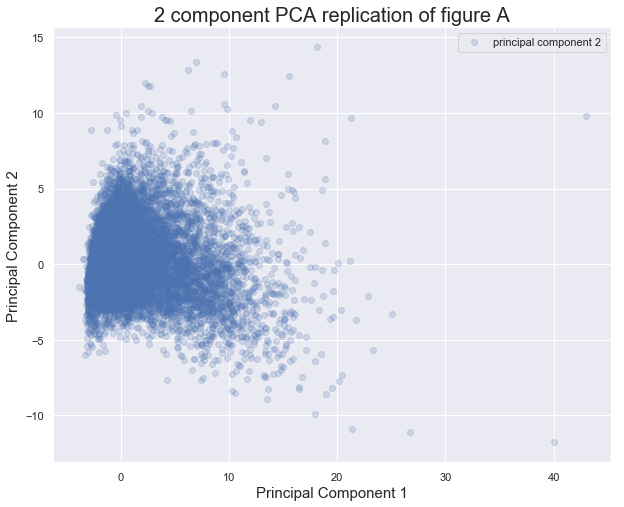

In [20]:
sns.set()

f, ax = plt.subplots(1, 1, figsize=(10, 8))

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA replication of figure A', fontsize = 20)
ax.scatter(principalDf_a['principal component 1']
               , principalDf_a['principal component 2'],alpha=0.2)
ax.legend()
#ax.set_xlim([-2.5,1000])
#ax.set_ylim([-2.5,1000])
plt.show()

In [218]:
for i,r in principalDf_a.iterrows():
    if r["principal component 1"] > 25 or r["principal component 2"] > 25:
        print(r)

principal component 1    29.698146
principal component 2    -6.843555
Name: 6333, dtype: float64


In [219]:
print(new_ls[6333])
dominating = [6333]
dict(new_ls[6333][2])

["rapper's delight", 'sugarhill gang', defaultdict(<class 'int'>, {'let': 9.0, 'feel': 3.0, 'some': 4.0, 'die': 1.0, 'hear': 7.0, 'rock': 34.0, 'must': 1.0, 'leave': 2.0, 'dad': 1.0, 'reporter': 2.0, 'ready': 1.0, 'tree': 1.0, 'clothe': 2.0, 'and': 109.5, 'big': 3.0, 'night': 5.0, 'seriou': 2.0, 'bodyguard': 1.0, 'because': 3.0, 'my': 18.5, 'while': 5.0, 'yeah': 1.0, 'test': 1.0, 'money': 2.0, 'taste': 2.0, 'best': 2.0, 'lincoln': 1.0, 'barkay': 1.5, 'jump': 4.5, 'bet': 1.0, 'by': 8.0, 'house': 4.0, 'front': 1.0, 'fight': 1.0, 'but': 15.0, 'light': 1.0, 'sing': 7.0, 'gonna': 17.0, 'crew': 1.0, 'treacherou': 1.0, 'advice': 1.0, 'stink': 1.0, 'credit': 1.0, "they're": 1.0, 'polite': 1.0, 'motel': 6.0, 'dance': 6.0, 'delight': 3.0, 'dive': 1.0, 'lower': 1.0, 'fawcett': 1.0, 'mic': 6.0, 'dracula': 1.0, 'boast': 1.0, 'atmosphere': 2.0, 'life': 1.0, 'checkbook': 1.0, 'put': 1.0, 'hand': 2.0, 'go': 21.0, 'dime': 1.0, 'they': 4.0, 'nine': 1.0, 'run': 1.0, 'basketball': 1.0, 'johnny': 1.0, 'mom

{'let': 9.0,
 'feel': 3.0,
 'some': 4.0,
 'die': 1.0,
 'hear': 7.0,
 'rock': 34.0,
 'must': 1.0,
 'leave': 2.0,
 'dad': 1.0,
 'reporter': 2.0,
 'ready': 1.0,
 'tree': 1.0,
 'clothe': 2.0,
 'and': 109.5,
 'big': 3.0,
 'night': 5.0,
 'seriou': 2.0,
 'bodyguard': 1.0,
 'because': 3.0,
 'my': 18.5,
 'while': 5.0,
 'yeah': 1.0,
 'test': 1.0,
 'money': 2.0,
 'taste': 2.0,
 'best': 2.0,
 'lincoln': 1.0,
 'barkay': 1.5,
 'jump': 4.5,
 'bet': 1.0,
 'by': 8.0,
 'house': 4.0,
 'front': 1.0,
 'fight': 1.0,
 'but': 15.0,
 'light': 1.0,
 'sing': 7.0,
 'gonna': 17.0,
 'crew': 1.0,
 'treacherou': 1.0,
 'advice': 1.0,
 'stink': 1.0,
 'credit': 1.0,
 "they're": 1.0,
 'polite': 1.0,
 'motel': 6.0,
 'dance': 6.0,
 'delight': 3.0,
 'dive': 1.0,
 'lower': 1.0,
 'fawcett': 1.0,
 'mic': 6.0,
 'dracula': 1.0,
 'boast': 1.0,
 'atmosphere': 2.0,
 'life': 1.0,
 'checkbook': 1.0,
 'put': 1.0,
 'hand': 2.0,
 'go': 21.0,
 'dime': 1.0,
 'they': 4.0,
 'nine': 1.0,
 'run': 1.0,
 'basketball': 1.0,
 'johnny': 1.0,
 'mom

In [21]:
clustering = AgglomerativeClustering(n_clusters=100).fit(tbl)

In [22]:
Counter(clustering.labels_)

Counter({9: 516,
         23: 4345,
         7: 236,
         21: 4536,
         41: 654,
         96: 23,
         39: 213,
         49: 893,
         87: 270,
         5: 1395,
         28: 99,
         52: 324,
         38: 274,
         44: 110,
         67: 42,
         89: 91,
         2: 283,
         33: 818,
         93: 50,
         48: 134,
         46: 226,
         18: 213,
         62: 217,
         43: 157,
         1: 807,
         15: 150,
         19: 42,
         79: 137,
         95: 78,
         34: 120,
         25: 142,
         66: 254,
         68: 375,
         55: 53,
         10: 222,
         8: 274,
         85: 13,
         90: 122,
         3: 64,
         11: 266,
         45: 54,
         26: 79,
         22: 274,
         99: 51,
         35: 74,
         24: 229,
         83: 142,
         60: 30,
         88: 107,
         29: 50,
         65: 8,
         0: 42,
         6: 634,
         82: 81,
         92: 28,
         42: 132,
         40: 162,
 

In [ ]:
clustering20 = AgglomerativeClustering(n_clusters=20).fit(tbl)

(22559, 2)


'\nfig = plt.figure(figsize=(10,10))\nax0 = fig.add_subplot(111)\nax0.scatter(data_projected[:,0],data_projected[:,1])\n'

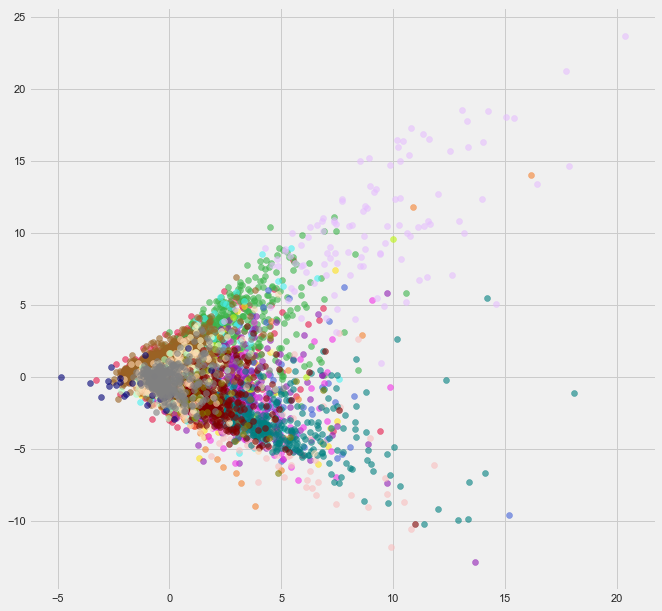

In [235]:
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
style.use('fivethirtyeight')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X_train,y_train=tbl,clustering.labels_

LDA = LinearDiscriminantAnalysis(n_components=2) # The n_components key word gives us the projection to the n most discriminative directions in the dataset. We set this parameter to two to get a transformation in two dimensional space.  
data_projected = LDA.fit_transform(X_train,y_train)
print(data_projected.shape)
# PLot the transformed data

colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']
fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)
for l,c in zip(np.unique(y_train),colors):
    ax0.scatter(data_projected[:,0][y_train==l],data_projected[:,1][y_train==l],c=c,alpha=0.6)
"""
fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)
ax0.scatter(data_projected[:,0],data_projected[:,1])
"""

In [241]:
wds = [(sc,w) for w,sc in zip(word["word"],word["songcount"])]    
wds.sort(reverse=True)

In [ ]:
elim = "know","get","i'm","go","like","say","make","come","see","take",""

In [243]:
wds[:50]

[(14301, 'know'),
 (13579, 'get'),
 (12972, 'love'),
 (12559, "i'm"),
 (12128, 'go'),
 (11049, 'like'),
 (10897, 'say'),
 (10424, 'make'),
 (10025, 'come'),
 (9824, 'see'),
 (9324, 'time'),
 (8748, 'take'),
 (8426, 'one'),
 (8333, 'feel'),
 (7863, 'let'),
 (7705, 'oh'),
 (7684, 'baby'),
 (7668, 'tell'),
 (7651, 'never'),
 (7524, 'way'),
 (7326, 'want'),
 (7276, 'think'),
 (6555, 'look'),
 (6366, 'right'),
 (6320, 'yeah'),
 (6236, 'back'),
 (6023, 'heart'),
 (6010, 'give'),
 (5981, 'day'),
 (5953, 'night'),
 (5870, 'thing'),
 (5855, 'girl'),
 (5593, "i'll"),
 (5190, 'keep'),
 (5044, 'life'),
 (5041, 'find'),
 (4897, 'try'),
 (4778, 'away'),
 (4778, "ain't"),
 (4716, 'gonna'),
 (4709, "i've"),
 (4559, 'man'),
 (4505, 'good'),
 (4484, 'eye'),
 (4389, 'hold'),
 (4377, 'around'),
 (4221, 'wanna'),
 (4199, 'little'),
 (4188, 'hear'),
 (4131, 'every')]

In [292]:
clustering2 = AgglomerativeClustering(n_clusters=20).fit(tbl)

In [293]:
Counter(clustering2.labels_)

Counter({1: 18877,
         9: 194,
         0: 1223,
         10: 249,
         16: 220,
         11: 139,
         2: 170,
         3: 366,
         14: 230,
         6: 69,
         8: 309,
         4: 190,
         17: 124,
         12: 89,
         13: 35,
         7: 20,
         5: 9,
         18: 16,
         19: 1,
         15: 3})

(22533, 2)


'\nfig = plt.figure(figsize=(10,10))\nax0 = fig.add_subplot(111)\nax0.scatter(data_projected[:,0],data_projected[:,1])\n'

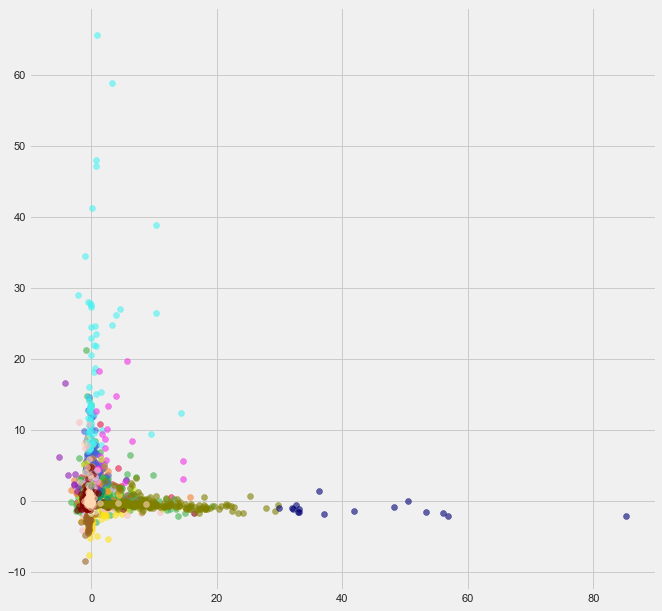

In [294]:
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
style.use('fivethirtyeight')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X_train,y_train=tbl,clustering2.labels_

LDA = LinearDiscriminantAnalysis(n_components=2) # The n_components key word gives us the projection to the n most discriminative directions in the dataset. We set this parameter to two to get a transformation in two dimensional space.  
data_projected = LDA.fit_transform(X_train,y_train)
print(data_projected.shape)
# PLot the transformed data

colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']
fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)
for l,c in zip(np.unique(y_train),colors):
    ax0.scatter(data_projected[:,0][y_train==l],data_projected[:,1][y_train==l],c=c,alpha=0.6)
"""
fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)
ax0.scatter(data_projected[:,0],data_projected[:,1])
"""